In [1]:
import readers
import functions
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from importlib import reload
#if is_changed(functions)

In [13]:
reload(functions)
#reload(readers)

<module 'functions' from 'C:\\Users\\optis\\OneDrive\\Documentos\\GRP\\final_stage\\results\\summary\\functions.py'>

#### Execute the cell below to reload changes done in module functions without restarting the kernel

# Parameter lists for every person (modify if necessary)

In [2]:
#Parameter lists
distance = ['2student','4student','2teacher','4teacher']                      #Adrián
renewalshour = [2,3,4,8]                                               #Vighnesh
roomtemp = [19,23,27]                                                  #Ronghao
exposuretime = ['60s','120s','240s','480s','980s']                            #Yibing
masktype = ['wall','cotton','N95']                                     #Malo
maskNumber = ['one','all']                                             #Malo
ncoughpeople = ['back','back+teach','front+teach','sides+teach','all'] #Sócrates
caseAdri = 'distance'
caseVig = 'ventilation'
caseRong = 'temp'
caseYib = 'student'
caseMal = 'maskType'
caseMal2 = 'maskNumber'
caseSoc = 'npeople'
#For mixed build:
paramlist = [ncoughpeople,renewalshour,roomtemp,exposuretime,masktype,maskNumber,distance]
caseslist = [caseSoc,caseVig,caseRong,caseYib,caseMal,caseMal2,caseAdri]
overalldict = dict(zip(caseslist,paramlist))

### Option 1: Load data with your casename and your parameter

In [3]:
zones,timesdict,massdict,totalsdict = functions.build(caseSoc,ncoughpeople)
functions.matchallnames(timesdict,massdict,zones,ncoughpeople)

start building...
building  back
Read zones: npeople_back.zones
Reading npeople_back summaries
building  back+teach
Read zones: npeople_back+teach.zones
Reading npeople_back+teach summaries
building  front+teach
Read zones: npeople_front+teach.zones
Reading npeople_front+teach summaries
building  sides+teach
Read zones: npeople_sides+teach.zones
Reading npeople_sides+teach summaries
building  all
Read zones: npeople_all.zones
Reading npeople_all summaries
timesdict name substitution back
massdict name substitution back
timesdict name substitution back+teach
massdict name substitution back+teach
timesdict name substitution front+teach
massdict name substitution front+teach
timesdict name substitution sides+teach
massdict name substitution sides+teach
timesdict name substitution all
massdict name substitution all


### Option 2: Build mixed dictionaries based on list mixedlist

In [4]:
mixedlist = ['wall','4student','sides+teach',8,23]
timesmixdict = dict.fromkeys(mixedlist)
massmixdict = dict.fromkeys(mixedlist)
totalsmixdict = dict.fromkeys(mixedlist)
zonesmixdict = dict.fromkeys(mixedlist)
back = False
for elem in mixedlist:
    if elem == 'back' and back == False:
        back = True
    elif elem == 'back' and back == True:
        continue
    for casename,plist in overalldict.items():
        print(casename,plist,elem)
        if elem in plist:
            zn,td,md,totd = functions.build(casename,[elem])
            functions.matchallnames(td,md,zn,[elem])
            timesmixdict[elem] = td[elem]
            massmixdict[elem] = md[elem]
            totalsmixdict[elem] = totd[elem]
            zonesmixdict[elem] = zn[elem]
            break
        else:
            print(elem,' not found in mixeddict')

npeople ['back', 'back+teach', 'front+teach', 'sides+teach', 'all'] wall
wall  not found in mixeddict
ventilation [2, 3, 4, 8] wall
wall  not found in mixeddict
temp [19, 23, 27] wall
wall  not found in mixeddict
student ['60s', '120s', '240s', '480s'] wall
wall  not found in mixeddict
maskType ['wall', 'cotton', 'N95'] wall
start building...
building  wall
Read zones: maskType_wall.zones
Reading maskType_wall summaries
timesdict name substitution wall
massdict name substitution wall
npeople ['back', 'back+teach', 'front+teach', 'sides+teach', 'all'] 4student
4student  not found in mixeddict
ventilation [2, 3, 4, 8] 4student
4student  not found in mixeddict
temp [19, 23, 27] 4student
4student  not found in mixeddict
student ['60s', '120s', '240s', '480s'] 4student
4student  not found in mixeddict
maskType ['wall', 'cotton', 'N95'] 4student
4student  not found in mixeddict
maskNumber ['one', 'all'] 4student
4student  not found in mixeddict
distance ['2student', '4student', '2teacher', '

### Calculate % of total particles and % of total mass for each fate. New columns are 'Particles %' and 'Mass %'

In [5]:
for key,item in timesdict.items():
    #we cannot use item as the dataframe to which apply the operation because item is a copy of the actual dataframe inside the dict
    timesdict[key] = functions.percentage(timesdict[key],'Number','Particles',totalsdict[key])
    timesdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in massdict.items():
    massdict[key] = functions.percentage(massdict[key],'Final','Mass',totalsdict[key])
    massdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in totalsdict.items():
    totalsdict[key].sort_index(axis=0,level='flowtime',inplace=True)
#For single parameter element:
#timesdict['2m'] = percentage(timesdict['2m'],'Number','Particles',totalsdict['2m'])
#massdict['2m'] = percentage(massdict['2m'],'Final','Mass',totalsdict['2m'])

## Same (percentages columns) for mixed dicts

In [6]:
for key,item in timesmixdict.items():
    #we cannot use item as the dataframe to which apply the operation because item is a copy of the actual dataframe inside the dict
    timesmixdict[key] = functions.percentage(timesmixdict[key],'Number','Particles',totalsmixdict[key])
    timesmixdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in massmixdict.items():
    massmixdict[key] = functions.percentage(massmixdict[key],'Final','Mass',totalsmixdict[key])
    massmixdict[key].sort_index(axis=0,level='flowtime',inplace=True)
for key,item in totalsmixdict.items():
    totalsmixdict[key].sort_index(axis=0,level='flowtime',inplace=True)
#For single parameter element:
#timesdict['2m'] = percentage(timesdict['2m'],'Number','Particles',totalsdict['2m'])
#massdict['2m'] = percentage(massdict['2m'],'Final','Mass',totalsdict['2m'])

## Use function.changekey to change the key name if you want so
It might help with the quality of the information that appears in the bar plot tick labels

use it with:   ourdict = functions.changekey(ourdict,old_key,new_key)

In [7]:
timesmixdict.keys()

dict_keys(['wall', '4student', 'sides+teach', 8, 23])

In [8]:
timesmixdict = functions.changekey(timesmixdict,8,'8 ventl./h')
timesmixdict = functions.changekey(timesmixdict,23,'23ºC')
timesmixdict = functions.changekey(timesmixdict,'wall','with Mask')
timesmixdict = functions.changekey(timesmixdict,'4student','4m dist')

In [9]:
timesmixdict.keys()

dict_keys(['sides+teach', '8 ventl./h', '23ºC', 'with Mask', '4m dist'])

## Export the state at a chosen instant to LaTeX table. 
Default number format is 2 decimals. If you need to change it do it inside functions.py or tell me

In [10]:
toprintcolumns = ['Fate','Number','Particles %']
instant = 60
#pass whatever instant and list of columns to instant_to_latex
functions.instant_to_latex(timesdict,toprintcolumns,instant,printdf=True)

|      | Fate                           |   Number |   Particles % |
|-----:|:-------------------------------|---------:|--------------:|
| 3381 | inFluid                        |    25054 |    73.2573    |
| 3382 | Trapped desks_floor3           |      414 |     1.21053   |
| 3383 | Trapped desks_floor4           |     5991 |    17.5175    |
| 3384 | Trapped floor34                |        8 |     0.0233918 |
| 3385 | Trapped mouth_coughing_student |     1214 |     3.54971   |
| 3386 | Trapped students_floor3        |      684 |     2         |
| 3387 | Trapped students_floor4        |      835 |     2.44152   |
|      | Fate                             |   Number |   Particles % |
|-----:|:---------------------------------|---------:|--------------:|
| 5226 | inFluid                          |   112212 |  85.9862      |
| 5227 | Trapped desk_teacher             |      394 |   0.301916    |
| 5228 | Trapped desks_floor1             |      616 |   0.472031    |
| 5229 | Trapped desks_f

## Drop a given list of matches (default is floor surfs, mouths, Escaped,roof/ceiling and 4th row students)
Returns the filtered dictionary

In [11]:
filterstrings = ['mouth','Trapped '+r'floor\d{1,2}','Escaped','roof','students_floor4','ceiling']
newtimesdict = functions.dropfates(timesdict,filterstrings) #drops all mouths, Escaped and floor surfaces (keeps non-floor zones labeled with floor in their name)
newmassdict = functions.dropfates(massdict,filterstrings)

#### Same for mixed dict

In [ ]:
filterstrings = ['mouth','Trapped '+r'floor\d{1,2}','Escaped','students_floor4','roof','ceiling']
newtimesmixdict = functions.dropfates(timesmixdict,filterstrings) #drops all mouths, Escaped and floor surfaces (keeps non-floor zones labeled with floor in their name)
newmassmixdict = functions.dropfates(massmixdict,filterstrings)

## ------------------
## Plot against parameter

In [ ]:
functions.plotagainstparam(timesdict,'Particles %','Trapped',40,'Trapped')
functions.plotagainstparam(timesdict,'Particles %','Fluid',40,'in Fluid')
plt.legend()
plt.title('Trapped particles in %')

### --------------------------------------
## BAR PLOT EXAMPLE

The function returns figure handle, ax.handles in a dict and bar lists in a dict with the passed fates as keys
Example: fig,ax,handles,bars = barplot(timesdict,"Particles %",60,["desk","in Fluid","Escaped","student"]
                                                                ^                      ^
                                                                |                      |
                                                               instant     list of fates/surfaces to search for
--------------------------------------------------------------------------------
Useful Commands:
ax.set_ylabel()
ax.set_title()
ax.set_xticks()
ax.set_xtickslabels
ax.legend()
ax.bar_label(handles[fate],padding=3)
plt.show()


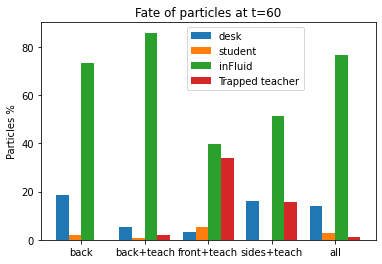

In [14]:
fates = ['desk','student','inFluid','Trapped teacher']
x = 1.5*np.arange(len(newtimesdict.keys()))
instant = 60
fix,ax,handles,bars = functions.barplot(newtimesdict,'Particles %',instant,fates)
ax.set_xticks(x)
ax.set_xticklabels(newtimesdict.keys())
ax.set_ylabel('Particles %')
ax.set_title('Fate of particles at t=' + str(instant))
ax.legend(bbox_to_anchor=(0.4,0.5,0.4,0.5),loc='best')
plt.savefig('socrabars.pdf')

#### Same for mixed dict

In [ ]:
fates = ['Trapped student','Fluid','Trapped mask','Trapped teacher','Trapped desk']
x = 1.5*np.arange(len(newtimesmixdict.keys()))
instant = 60
fix,ax,handles,bars = functions.barplot(newtimesmixdict,'Particles %',instant,fates)
ax.set_xticks(x)
ax.set_xticklabels(newtimesmixdict.keys())
ax.set_ylabel('Particles %')
ax.set_title('Fate of particles at t=' + str(instant))
ax.legend(bbox_to_anchor=(0.56,0.5,0.3,0.5),loc='best')
plt.savefig('mixedbars.pdf')

# -----------------------------
# Time Evolution plot
- If you pass mix=False there will be one figure for every key (wall,side+teach,etc)
- If you pass mix=True everything will be plotted in one figure
- savefig=False deactivate figure save

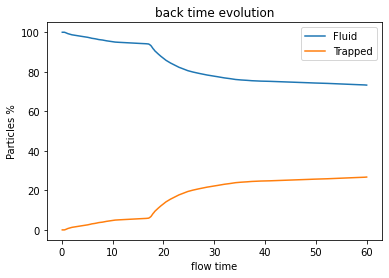

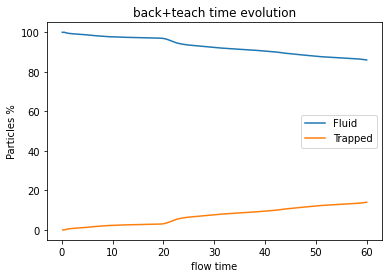

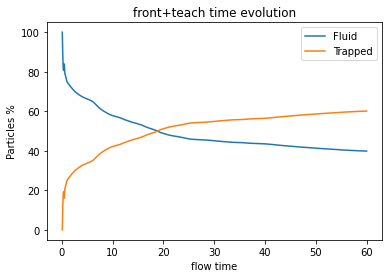

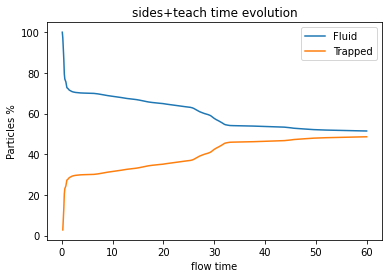

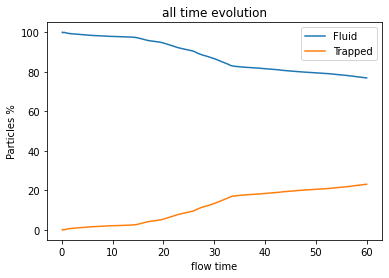

In [16]:
fates = ['Fluid','Trapped'] #,'desk','teacher','student'
functions.plotagainsttime(timesdict,fates,mix=True,savefig=False)

#### Same for mixed

In [ ]:
fates = ['Fluid','student','desk']
functions.plotagainsttime(newtimesmixdict,fates,mix=True,savefig=True)

## -------------------------------------------------------------
# Look for a column across the dictionary (and save it to LaTeX)

In [17]:
instant = 60
resdf = functions.colacrossparam(timesdict,instant,col='Particles %')
display(resdf)
resdf.to_latex(buf='colacrossparam.tex',float_format="f{:0.2f}".format,index=False)

Particles %                                    \
                                 Fate       back back+teach front+teach   
0                             inFluid   73.25731  85.986207   39.881114   
1                Trapped desks_floor3   1.210526   0.232184           -   
2                Trapped desks_floor4  17.517544   4.429119           -   
3                     Trapped floor34   0.023392   0.000766           -   
4      Trapped mouth_coughing_student   3.549708          -           -   
5             Trapped students_floor3        2.0   0.637548           -   
6             Trapped students_floor4    2.44152   1.602299           -   
7                Trapped desk_teacher          -   0.301916    0.994733   
8                Trapped desks_floor1          -   0.472031    2.294959   
9                     Trapped floor12          -   1.959387    3.162528   
10   Trapped mouth_floor4_middle_left          -   0.980077           -   
11              Trapped mouth_teacher          -    1.34636     6.14146   
12                    Trapped teacher          -   2.052107   34.145974   
13               Trapped desks_floor2          -          -    0.042137   
14  Trapped mouth_floor1_middle_right          -          -    8.116629   
15            Trapped students_floor1          -          -    5.220467   
16                    Trapped ceiling          -          -           -   
17              Escaped floor_outlets          -          -           -   
18          Trapped mouth_floor2_left          -          -           -   
19         Trapped mouth_floor3_right          -          -           -   
20            Trapped students_floor2          -          -           -   
21                     Trapped floor4          -          -           -   

                           
   sides+teach        all  
0    51.424405  76.881072  
1     4.139881   2.805276  
2            -    2.73995  
3            -   0.006281  
4            -          -  
5     0.094643   0.666248  
6            -   0.261307  
7     5.404167    0.45938  
8     0.264286   3.566164  
9       1.5125    2.54397  
10           -   0.446399  
11      14.025   0.845059  
12   15.869643   1.160385  
13    6.377976   4.487018  
14           -   0.531826  
15    0.008333   2.010469  
16    0.157143          -  
17    0.003571   0.000419  
18    0.276786    0.23995  
19    0.438095   0.322027  
20    0.004167   0.026382  
21           -   0.000419

In [18]:
resdf = functions.dropfates(resdf,['mouth','Trapped '+r'floor\d{1,2}'])

In [19]:
resdf

Particles %                                                \
                       Fate       back back+teach front+teach sides+teach   
0                   inFluid   73.25731  85.986207   39.881114   51.424405   
1      Trapped desks_floor3   1.210526   0.232184           -    4.139881   
2      Trapped desks_floor4  17.517544   4.429119           -           -   
5   Trapped students_floor3        2.0   0.637548           -    0.094643   
6   Trapped students_floor4    2.44152   1.602299           -           -   
7      Trapped desk_teacher          -   0.301916    0.994733    5.404167   
8      Trapped desks_floor1          -   0.472031    2.294959    0.264286   
12          Trapped teacher          -   2.052107   34.145974   15.869643   
13     Trapped desks_floor2          -          -    0.042137    6.377976   
15  Trapped students_floor1          -          -    5.220467    0.008333   
16          Trapped ceiling          -          -           -    0.157143   
17    Escaped floor_outlets          -          -           -    0.003571   
20  Trapped students_floor2          -          -           -    0.004167   

               
          all  
0   76.881072  
1    2.805276  
2     2.73995  
5    0.666248  
6    0.261307  
7     0.45938  
8    3.566164  
12   1.160385  
13   4.487018  
15   2.010469  
16          -  
17   0.000419  
20   0.026382

## Other things

### Print several documentations (out of date though)

In [ ]:
print('READ_RESULTS INSTRUCTIONS')
print('----------------------------------------------')
print(read_results.__doc__)
print('-----------------------------------------------')
print('')
print('PERCENTAGE INSTRUCTIONS')
print('----------------------------------------------')
print(percentage.__doc__)
print('-----------------------------------------------')
print('')
print('PLOT AGAINST PARAM INSTRUCTIONS')
print('----------------------------------------------')
print(plotagainstparam.__doc__)
print('MATCHNAMES INSTRUCTIONS')
print('----------------------------------------------')
print(readers.matchnames.__doc__)

# EXAMPLES ON HOW TO ACCESS THE DATA:

In [ ]:
timesdict['sides+teach'].loc[timesdict['sides+teach'].Fate.str.contains(fr"desk",regex=True)]

In [ ]:
massdict['2m'].loc[60]

In [ ]:
totalsdict

In [ ]:
massdict['4m']['Mass %']

In [ ]:
timesdict['2m'].loc[0.6,'Particles %']